# Install libraries

In [6]:
# Install geopandas
! pip install geopandas

     |████████████████████████████████| 1.0MB 4.4MB/s 
     |████████████████████████████████| 15.3MB 262kB/s 
     |████████████████████████████████| 6.5MB 29.6MB/s 


In [7]:
# Install libproj-dev proj-data proj-bin
! apt-get install libproj-dev proj-data proj-bin

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libproj-dev is already the newest version (4.9.3-2).
libproj-dev set to manually installed.
proj-data is already the newest version (4.9.3-2).
proj-data set to manually installed.
The following NEW packages will be installed:
  proj-bin
0 upgraded, 1 newly installed, 0 to remove and 31 not upgraded.
Need to get 32.3 kB of archives.
After this operation, 110 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 proj-bin amd64 4.9.3-2 [32.3 kB]
Fetched 32.3 kB in 0s (91.4 kB/s)
Selecting previously unselected package proj-bin.
(Reading database ... 160983 files and directories currently installed.)
Preparing to unpack .../proj-bin_4.9.3-2_amd64.deb ...
Unpacking proj-bin (4.9.3-2) ...
Setting up proj-bin (4.9.3-2) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...


In [8]:
# Install libgeos-dev
! apt-get install libgeos-dev

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libgeos-dev is already the newest version (3.6.2-1build2).
libgeos-dev set to manually installed.
0 upgraded, 0 newly installed, 0 to remove and 31 not upgraded.


In [9]:
# Install other libraries
! pip install cython
! pip install cartopy
! pip install geoplot

     |████████████████████████████████| 14.4MB 319kB/s 
     |████████████████████████████████| 225kB 44.2MB/s 
  Created wheel for cartopy: filename=Cartopy-0.18.0-cp37-cp37m-linux_x86_64.whl size=15127706 sha256=0cb978cffd6ed668ec087889b8b568be2887bc70d73cd8f5d490a3c8b82eac19
  Stored in directory: /root/.cache/pip/wheels/8d/f8/da/2c05136f2162370d2baec85bfbbf91d7729ab9e248da878acd
  Created wheel for pyshp: filename=pyshp-2.1.3-cp37-none-any.whl size=37264 sha256=7b8b1bd83ad2538ba3376211cb6a9f85b5ad925ffc6650cd7529df321d06aefa
  Stored in directory: /root/.cache/pip/wheels/76/2b/d4/53e6b9a0fb0a9f9f29664cf82605af8bc81d5ab44d987896dd
Successfully built cartopy pyshp
     |████████████████████████████████| 19.1MB 1.2MB/s 


# Import libraries

In [10]:
import requests
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import geoplot as gplt

# Explore the traffic images API
### Call the API
We'll be making an API call for the date of 2019-01-01, at 00:00:00. 

In [16]:
import json

In [17]:
# Step 3a: Declare the request URL
url = 'https://api.data.gov.sg/v1/transport/traffic-images?date_time=2019-01-01T00%3A00%3A00'

# Step 3b: Make an API request and save the results in a variable
data = requests.get(url).json()

### Turn the appropriate JSON response into a dataframe

In [18]:
# Save the data to a new object without the excess key-value pairs
items = data['items'][0]['cameras']

In [19]:
# Convert the list to a JSON string
jsonStr = json.dumps(items)
type(jsonStr)

str

In [20]:
# Step 5: Get a DataFrame from the JSON
df = pd.json_normalize(items)

In [21]:
# View the resulting dataframe
df.head()

,timestamp,image,camera_id,location.latitude,location.longitude,image_metadata.height,image_metadata.width,image_metadata.md5
0,2018-12-31T23:59:44+08:00,https://images.data.gov.sg/api/traffic-images/...,1501,1.274144,103.851317,240,320,95feb086c24db3ac1be9b1e6dc194194
1,2018-12-31T23:59:44+08:00,https://images.data.gov.sg/api/traffic-images/...,1502,1.271351,103.861828,240,320,d2dbeaed33ac9a523eb8f9a4138657d0
2,2018-12-31T23:59:44+08:00,https://images.data.gov.sg/api/traffic-images/...,1503,1.270664,103.856978,240,320,fdd3313e5a4a2b786444a7371db349c9
3,2018-12-31T23:59:44+08:00,https://images.data.gov.sg/api/traffic-images/...,1504,1.294099,103.876056,240,320,b8f1220bff0f26bc0ec11521e2b16fc1
4,2018-12-31T23:59:44+08:00,https://images.data.gov.sg/api/traffic-images/...,1505,1.275298,103.866390,240,320,ba53008cf3198ed272e8d35e52db1354


In [22]:
# Check the number of rows and columns of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   timestamp              87 non-null     object 
 1   image                  87 non-null     object 
 2   camera_id              87 non-null     object 
 3   location.latitude      87 non-null     float64
 4   location.longitude     87 non-null     float64
 5   image_metadata.height  87 non-null     int64  
 6   image_metadata.width   87 non-null     int64  
 7   image_metadata.md5     87 non-null     object 
dtypes: float64(2), int64(2), object(4)
memory usage: 5.6+ KB


# Map the traffic camera locations
### Mount Google Drive

In [3]:
# Mount Google Drive to access project files
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Read the SHP file for Singapore's map into a GeoDataFrame


In [11]:
# Read the SHP file that was uploaded to Google Drive
shp = gpd.read_file('/content/drive/MyDrive/Colab Notebooks/UpLevel SG Traffic/master-plan-2014-subzone-boundary-no-sea-shp/MP14_SUBZONE_NO_SEA_PL.shp')

In [ ]:
# View the geopandas object
shp.head()

,OBJECTID,SUBZONE_NO,SUBZONE_N,SUBZONE_C,CA_IND,PLN_AREA_N,PLN_AREA_C,REGION_N,REGION_C,INC_CRC,FMEL_UPD_D,X_ADDR,Y_ADDR,SHAPE_Leng,SHAPE_Area,geometry
0,1,2,PEOPLE'S PARK,OTSZ02,Y,OUTRAM,OT,CENTRAL REGION,CR,B4120D23006C932A,2016-05-11,28831.7807,29419.6457,1822.192718,93140.437642,"POLYGON ((29099.021 29640.030, 29116.963 29625..."
1,2,2,BUKIT MERAH,BMSZ02,N,BUKIT MERAH,BM,CENTRAL REGION,CR,1C51019439A68700,2016-05-11,26360.7990,29384.1429,3074.963235,411722.822583,"POLYGON ((26750.092 29216.098, 26751.912 29173..."
2,3,3,CHINATOWN,OTSZ03,Y,OUTRAM,OT,CENTRAL REGION,CR,0FF1661344C84AED,2016-05-11,29153.9676,29158.0443,4297.599910,587222.678854,"POLYGON ((29161.201 29723.071, 29189.033 29704..."
3,4,4,PHILLIP,DTSZ04,Y,DOWNTOWN CORE,DT,CENTRAL REGION,CR,615D4EDDEF809F8E,2016-05-11,29706.7242,29744.9079,871.554888,39437.935270,"POLYGON ((29814.107 29616.894, 29806.682 29593..."
4,5,5,RAFFLES PLACE,DTSZ05,Y,DOWNTOWN CORE,DT,CENTRAL REGION,CR,72107B11807074F4,2016-05-11,29968.6175,29572.7618,1872.752161,188767.489706,"POLYGON ((30137.768 29843.194, 30138.417 29841..."


In [ ]:
# View the number of rows and columns of the shp object
shp.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 323 entries, 0 to 322
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    323 non-null    int64   
 1   SUBZONE_NO  323 non-null    int64   
 2   SUBZONE_N   323 non-null    object  
 3   SUBZONE_C   323 non-null    object  
 4   CA_IND      323 non-null    object  
 5   PLN_AREA_N  323 non-null    object  
 6   PLN_AREA_C  323 non-null    object  
 7   REGION_N    323 non-null    object  
 8   REGION_C    323 non-null    object  
 9   INC_CRC     323 non-null    object  
 10  FMEL_UPD_D  323 non-null    object  
 11  X_ADDR      323 non-null    float64 
 12  Y_ADDR      323 non-null    float64 
 13  SHAPE_Leng  323 non-null    float64 
 14  SHAPE_Area  323 non-null    float64 
 15  geometry    323 non-null    geometry
dtypes: float64(4), geometry(1), int64(2), object(9)
memory usage: 40.5+ KB


### Convert the Singaporean map's coordinate system
Currently, the x and y coordinates of the Singapore polygons are not in the usual longitude and latitude format. Instead, they are currently in SYV21 format and will require conversion to the EPSG:4326, which is the standard coordinate format used in GPS.

In [ ]:
# Create a copy of the shp gp dataframe
shp_copy = shp

In [ ]:
# Replace the coordinates of the geometry values in in shp_copy
shp_copy['geometry'] = shp_copy['geometry'].to_crs(epsg=4326)

In [ ]:
# Check the resulting gp dataframe
shp_copy.head()

,OBJECTID,SUBZONE_NO,SUBZONE_N,SUBZONE_C,CA_IND,PLN_AREA_N,PLN_AREA_C,REGION_N,REGION_C,INC_CRC,FMEL_UPD_D,X_ADDR,Y_ADDR,SHAPE_Leng,SHAPE_Area,geometry
0,1,2,PEOPLE'S PARK,OTSZ02,Y,OUTRAM,OT,CENTRAL REGION,CR,B4120D23006C932A,2016-05-11,28831.7807,29419.6457,1822.192718,93140.437642,"POLYGON ((103.84319 1.28433, 103.84335 1.28420..."
1,2,2,BUKIT MERAH,BMSZ02,N,BUKIT MERAH,BM,CENTRAL REGION,CR,1C51019439A68700,2016-05-11,26360.7990,29384.1429,3074.963235,411722.822583,"POLYGON ((103.82209 1.28049, 103.82210 1.28011..."
2,3,3,CHINATOWN,OTSZ03,Y,OUTRAM,OT,CENTRAL REGION,CR,0FF1661344C84AED,2016-05-11,29153.9676,29158.0443,4297.599910,587222.678854,"POLYGON ((103.84375 1.28508, 103.84400 1.28491..."
3,4,4,PHILLIP,DTSZ04,Y,DOWNTOWN CORE,DT,CENTRAL REGION,CR,615D4EDDEF809F8E,2016-05-11,29706.7242,29744.9079,871.554888,39437.935270,"POLYGON ((103.84962 1.28412, 103.84955 1.28391..."
4,5,5,RAFFLES PLACE,DTSZ05,Y,DOWNTOWN CORE,DT,CENTRAL REGION,CR,72107B11807074F4,2016-05-11,29968.6175,29572.7618,1872.752161,188767.489706,"POLYGON ((103.85253 1.28617, 103.85253 1.28615..."


### Turn the Pandas DataFrame into a GeoDataFrame
So that we can plot the camera locations on the Singapore map, the pandas dataframe will be converted into a geodataframe.

In [23]:
# Get a GeoDataFrame from the pandas DataFrame
df_geo = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df['location.longitude'], df['location.latitude']))

In [ ]:
# Check the resulting gp dataframe
df_geo.head()

,timestamp,image,camera_id,location.latitude,location.longitude,image_metadata.height,image_metadata.width,image_metadata.md5,geometry
0,2018-12-31T23:59:44+08:00,https://images.data.gov.sg/api/traffic-images/...,1501,1.274144,103.851317,240,320,95feb086c24db3ac1be9b1e6dc194194,POINT (103.85132 1.27414)
1,2018-12-31T23:59:44+08:00,https://images.data.gov.sg/api/traffic-images/...,1502,1.271351,103.861828,240,320,d2dbeaed33ac9a523eb8f9a4138657d0,POINT (103.86183 1.27135)
2,2018-12-31T23:59:44+08:00,https://images.data.gov.sg/api/traffic-images/...,1503,1.270664,103.856978,240,320,fdd3313e5a4a2b786444a7371db349c9,POINT (103.85698 1.27066)
3,2018-12-31T23:59:44+08:00,https://images.data.gov.sg/api/traffic-images/...,1504,1.294099,103.876056,240,320,b8f1220bff0f26bc0ec11521e2b16fc1,POINT (103.87606 1.29410)
4,2018-12-31T23:59:44+08:00,https://images.data.gov.sg/api/traffic-images/...,1505,1.275298,103.866390,240,320,ba53008cf3198ed272e8d35e52db1354,POINT (103.86639 1.27530)


### Plot the camera coordinates over the Singapore map

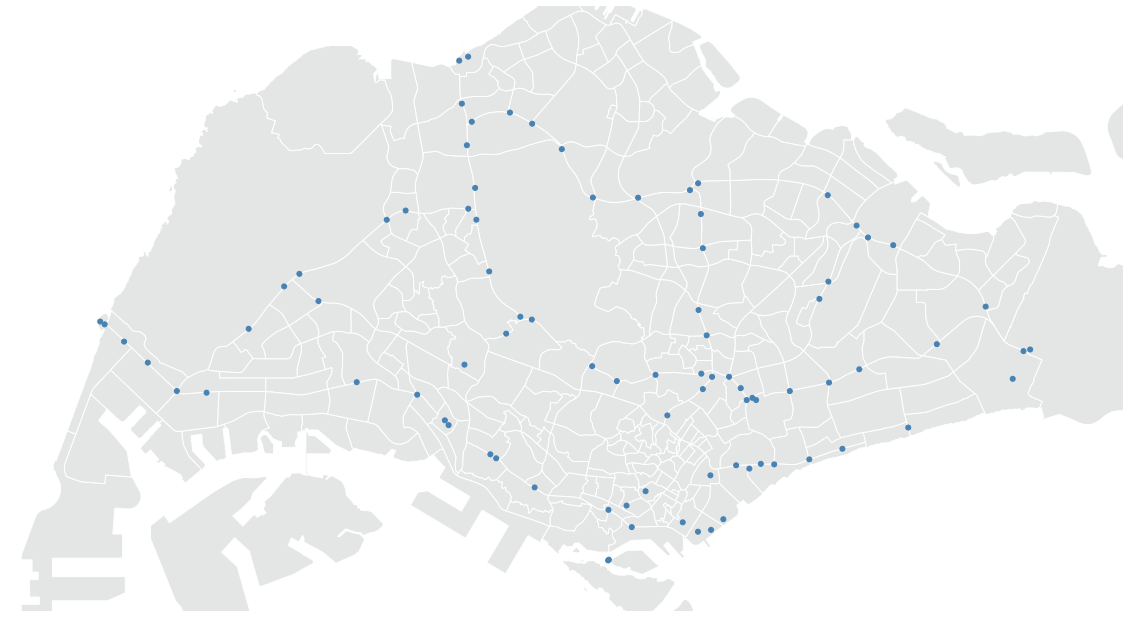

In [ ]:
import geoplot.crs as gcrs

# Plot the map
ax = gplt.polyplot(shp_copy, figsize=(20,15), edgecolor='white', facecolor='#e4e6e5')

# Plot the coordinates of the cameras
gplt.pointplot(df_geo, ax=ax)

### Label the points with camera IDs

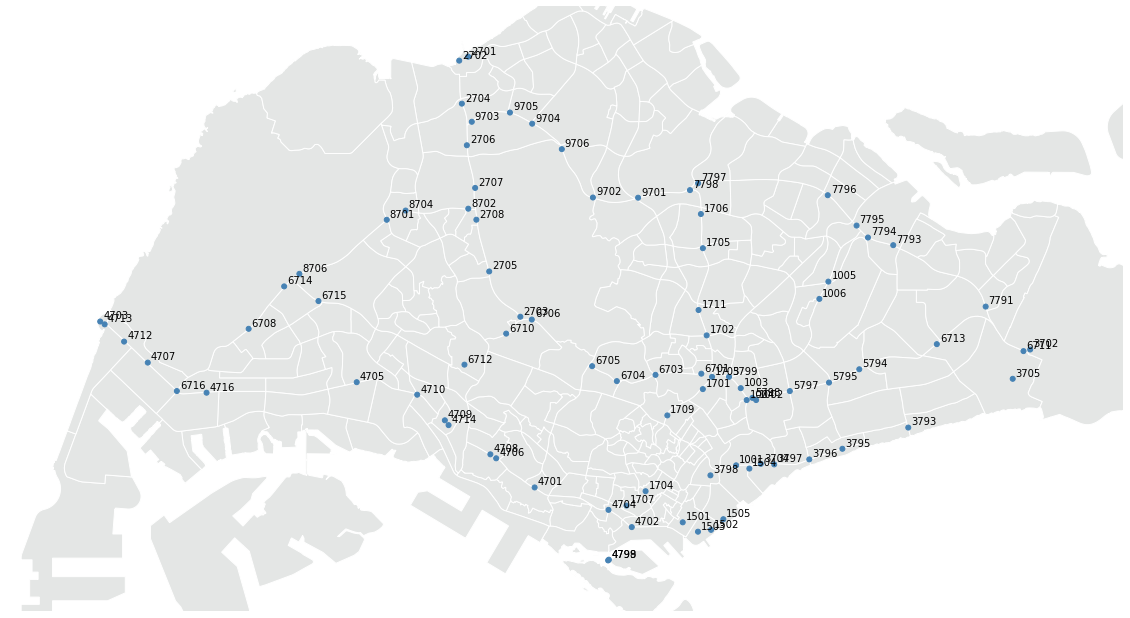

In [ ]:
# Plot the map with labeled camera locations

ax = gplt.polyplot(shp_copy, figsize=(20,15), edgecolor='white', facecolor='#e4e6e5')
gplt.pointplot(df_geo, ax=ax)

for x, y, label in zip(df_geo.geometry.x, df_geo.geometry.y, df_geo['camera_id']):
    ax.annotate(label, xy=(x, y), xytext=(3, 3), textcoords="offset points")

### Generate a more detailed Singapore map
Once the location of the downtown area is mapped, we will decide on one camera whose images we will analyze.

In [12]:
# Create another copy of the shp gp dataframe
shp_copy2 = shp

In [13]:
# Reformat the coordinates in shp_copy2
shp_copy2['geometry'] = shp_copy2['geometry'].to_crs(epsg=3857)

In [14]:
import contextily as ctx # This package will generate a more detailed background map

In [24]:
# Create a copy of the gp dataframe
df_geo2 = df_geo

# Indicate the cooordinate format of the gp dataframe
df_geo2.crs = "EPSG:4326"

# Reformat the coordinates to EPSG:3857 for compatibility with the ctx package
df_geo2['geometry'] = df_geo2['geometry'].to_crs(epsg=3857)

#### Identify the subzones closest to the geographical median of the downtown area

In [26]:
# Store the boundary data of the Downtown Core areas in a variable
downtown_core = shp_copy2[shp_copy2.PLN_AREA_N == 'DOWNTOWN CORE']

# Store the median Y_ADDR value in a variable
input_y = downtown_core.median()['Y_ADDR']

# Store the two zones closest to the median Y_ADDR value in a variable
median_y_dcore = downtown_core.iloc[(downtown_core['Y_ADDR']-input_y).abs().argsort()[:2]]

# Show the two zones
median_y_dcore

,OBJECTID,SUBZONE_NO,SUBZONE_N,SUBZONE_C,CA_IND,PLN_AREA_N,PLN_AREA_C,REGION_N,REGION_C,INC_CRC,FMEL_UPD_D,X_ADDR,Y_ADDR,SHAPE_Leng,SHAPE_Area,geometry
4,5,5,RAFFLES PLACE,DTSZ05,Y,DOWNTOWN CORE,DT,CENTRAL REGION,CR,72107B11807074F4,2016-05-11,29968.6175,29572.7618,1872.752161,188767.489706,"POLYGON ((11560810.455 143187.335, 11560811.10..."
7,8,12,BAYFRONT SUBZONE,DTSZ12,Y,DOWNTOWN CORE,DT,CENTRAL REGION,CR,197F5E664DA4D5E1,2016-05-11,30806.2418,29530.1670,2897.126426,521200.522376,"POLYGON ((11561517.727 142360.356, 11561467.11..."


Since the Raffles Place and Bayfront subzones are closest to the geographical median of the downtown area, we will analyze traffic images from a camera that is located near these zones.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The "url" option is deprecated. Please use the "source" argument instead.
  


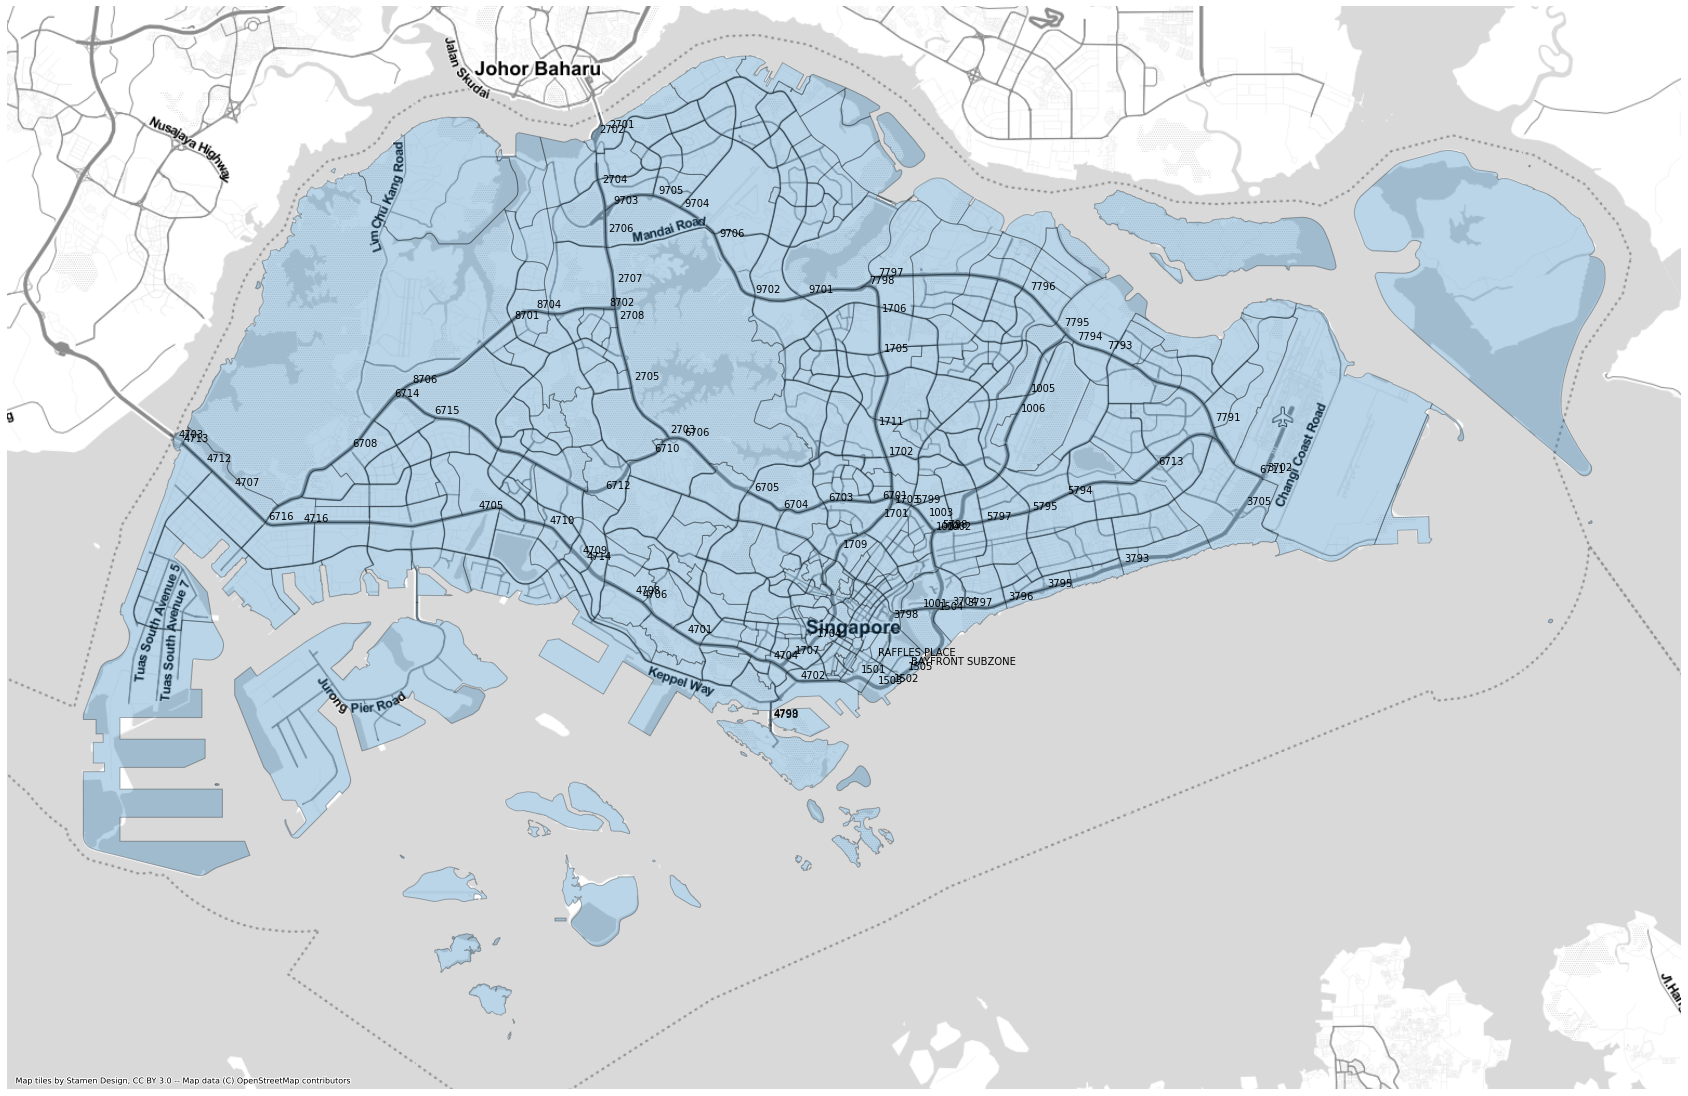

In [ ]:
ax3 = shp_copy2.plot(figsize=(30, 20), alpha=0.3, edgecolor='k')
ctx.add_basemap(ax3, url=ctx.providers.Stamen.TonerLite)
ax3.set_axis_off()

for x, y, label in zip(df_geo2.geometry.x, df_geo2.geometry.y, df_geo2['camera_id']):
    ax3.annotate(label, xy=(x, y), xytext=(3, 3), textcoords="offset points")

for x, y, label in zip(df_geo2.geometry.x, df_geo2.geometry.y, median_y_dcore['SUBZONE_N']):
    ax3.annotate(label, xy=(x, y), xytext=(20, 20), textcoords="offset points", )

### Step 12: Download and view images
Now that we know where the cameras are located, let's check out a few of the images captured by these cameras. 

![SingaporeCameraLocations](https://uplevelsg.s3-ap-southeast-1.amazonaws.com/ProjectComputerVisionTraffic/SingaporeCameraLocations.png)

We'll focus on the city centers, but feel free to try other cameras too.

You can do it the good old fashioned way by retrieving the URLs of the images that correspond to each camera, and downloading the image directly from the URL for viewing.


In [ ]:
# Step 12: Download camera pictures and examine them

In [ ]:
# Create a new list
urls = []

# Extract the image urls from 'data' and store them in the 'urls' list
for item in range(len(data['items'][0]['cameras'])):
    urls.append(data['items'][0]['cameras'][item]['image'])

In [ ]:
# Check whether the urls were stored in the list
urls

['https://images.data.gov.sg/api/traffic-images/2018/12/bc2c0b04-57d6-49a7-9512-bd1fe7d46144.jpg',
 'https://images.data.gov.sg/api/traffic-images/2018/12/28348084-e55a-4df9-a663-b6fb05c0f2f8.jpg',
 'https://images.data.gov.sg/api/traffic-images/2018/12/dd0bbbbf-9e86-40d7-8ce8-0d35f23dfc8f.jpg',
 'https://images.data.gov.sg/api/traffic-images/2018/12/25d4584a-dac4-446d-bd54-66547215f58b.jpg',
 'https://images.data.gov.sg/api/traffic-images/2018/12/59b3fbc7-6825-414f-a2a6-e4c12f948976.jpg',
 'https://images.data.gov.sg/api/traffic-images/2018/12/91cc5b0e-92d3-49cd-a314-98fc01cbe193.jpg',
 'https://images.data.gov.sg/api/traffic-images/2018/12/260ec838-1e39-4d4c-8db5-95ade8a0af84.jpg',
 'https://images.data.gov.sg/api/traffic-images/2018/12/15b4e34f-db0d-4709-b019-a00ad5f286fb.jpg',
 'https://images.data.gov.sg/api/traffic-images/2018/12/233451ad-ab9b-48d2-9345-0dde947d8291.jpg',
 'https://images.data.gov.sg/api/traffic-images/2018/12/9bf8f0aa-7681-4aa2-a540-2e7eed08690d.jpg',
 'https://

In [ ]:
from google.colab import files # This library will enable us to download the image files from Google Colab to our local storage

In [ ]:
# Create a for loop that will iterate through the list of image URLs and save each file

counter = 0

for i in urls:
    file_name = str(counter) + '.jpg'
    print(file_name)
    response = requests.get(i)
    file = open(file_name, "wb")
    file.write(response.content)
    files.download(file_name, )
    file.close()
    counter += 1

0.jpg


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

1.jpg


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

2.jpg


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

3.jpg


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

4.jpg


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

5.jpg


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

6.jpg


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

7.jpg


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

8.jpg


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

9.jpg


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

10.jpg


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

11.jpg


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

12.jpg


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

13.jpg


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

14.jpg


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

15.jpg


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

16.jpg


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

17.jpg


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

18.jpg


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

19.jpg


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

20.jpg


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

21.jpg


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

22.jpg


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

23.jpg


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

24.jpg


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

25.jpg


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

26.jpg


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

27.jpg


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

28.jpg


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

29.jpg


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

30.jpg


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

31.jpg


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

32.jpg


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

33.jpg


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

34.jpg


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

35.jpg


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

36.jpg


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

37.jpg


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

38.jpg


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

39.jpg


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

40.jpg


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

41.jpg


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

42.jpg


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

43.jpg


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

44.jpg


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

45.jpg


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

46.jpg


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

47.jpg


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

48.jpg


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

49.jpg


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

50.jpg


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

51.jpg


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

52.jpg


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

53.jpg


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

54.jpg


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

55.jpg


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

56.jpg


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

57.jpg


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

58.jpg


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

59.jpg


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

60.jpg


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

61.jpg


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

62.jpg


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

63.jpg


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

64.jpg


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

65.jpg


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

66.jpg


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

67.jpg


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

68.jpg


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

69.jpg


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

70.jpg


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

71.jpg


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

72.jpg


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

73.jpg


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

74.jpg


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

75.jpg


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

76.jpg


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

77.jpg


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

78.jpg


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

79.jpg


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

80.jpg


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

81.jpg


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

82.jpg


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

83.jpg


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

84.jpg


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

85.jpg


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

86.jpg


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Add all image files to a zip file for easy downloading
! zip camera_images.zip *.jpg

  adding: 0.jpg (deflated 1%)
  adding: 10.jpg (deflated 1%)
  adding: 11.jpg (deflated 1%)
  adding: 12.jpg (deflated 1%)
  adding: 13.jpg (deflated 2%)
  adding: 14.jpg (deflated 1%)
  adding: 15.jpg (deflated 1%)
  adding: 16.jpg (deflated 2%)
  adding: 17.jpg (deflated 1%)
  adding: 18.jpg (deflated 1%)
  adding: 19.jpg (deflated 2%)
  adding: 1.jpg (deflated 1%)
  adding: 20.jpg (deflated 2%)
  adding: 21.jpg (deflated 1%)
  adding: 22.jpg (deflated 1%)
  adding: 23.jpg (deflated 1%)
  adding: 24.jpg (deflated 2%)
  adding: 25.jpg (deflated 2%)
  adding: 26.jpg (deflated 2%)
  adding: 27.jpg (deflated 1%)
  adding: 28.jpg (deflated 2%)
  adding: 29.jpg (deflated 3%)
  adding: 2.jpg (deflated 1%)
  adding: 30.jpg (deflated 2%)
  adding: 31.jpg (deflated 2%)
  adding: 32.jpg (deflated 2%)
  adding: 33.jpg (deflated 1%)
  adding: 34.jpg (deflated 2%)
  adding: 35.jpg (deflated 2%)
  adding: 36.jpg (deflated 1%)
  adding: 37.jpg (deflated 1%)
  adding: 38.jpg (deflated 2%)
  adding: 3

In [ ]:
# Download the zip file to local storage
files.download('camera_images.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>